# HW4P2: Automatic Speech Recognition with an Encoder-Decoder Transformer

# Schedule:
- Checkpoint Submission (DUE 21 November 2025 @ 11:59PM EST)
- Kaggle Submission (DUE 5 December 2025 @ 11:59PM EST | Slack Deadline is 11 December 2025 @ 11:59PM EST)
- Code Submission (DUE 7 December 2025 @ 11:59PM EST OR Day-of Slack submission)


## Requirement Acknowledgement
Setting the below flag to True indicates full understanding and acceptance of the following:
1. Slack days may ONLY be used on P2 FINAL (not checkpoint) submission. I.e. you may use slack days to submit final P2 kaggle scores (such as this one) later on the **SLACK KAGGLE COMPETITION** at the expense of your Slack days.
2. The final autolab **code submission is due 48 hours after** the conclusion of the Kaggle Deadline (or, the same day as your final kaggle submission).
3. We will require your kaggle username here, and then we will pull your official PRIVATE kaggle leaderboard score. This submission may result in slight variance in scores/code, but we will check for acceptable discrepancies. Any discrepancies related to modifying the submission code (at the bottom of the notebook) will result in an AIV.
4. You are NOT allowed to use any code that will pre-load models (such as those from Hugging Face, etc.).
   You MAY use models described by papers or articles, but you MUST implement them yourself through fundamental PyTorch operations (i.e. Linear, Conv2d, etc.).
5. You are NOT allowed to use any external data/datasets at ANY point of this assignment.
6. You may work with teammates to run ablations/experiments, BUT you must submit your OWN code and your OWN results.
7. Failure to comply with the prior rules will be considered an Academic Integrity Violation (AIV).
8. Late submissions MUST be submitted through the Slack Kaggle (see writeup for details). Any submissions made to the regular Kaggle after the original deadline will NOT be considered, no matter how many slack days remain for the student.

In [28]:
ACKNOWLEDGED = True #TODO: Only set Acknowledged to True if you have read the above acknowlegements and agree to ALL of them.

# Setup
-  Follow the setup instructions based on your preferred environment!

## Local

One of our key goals in designing this assignment is to allow you to complete most of the preliminary implementation work locally.  
We highly recommend that you **pass all tests locally** using the provided `hw4_data_subset` before moving to a GPU runtime.  
To do this, simply:

### Create a new conda environment
```bash
# Be sure to deactivate any active environments first
conda create -n hw4 python=3.12.4
```

### Activate the conda environment
```bash
conda activate hw4
```

### Install the dependencies using the provided `requirements.txt`
```bash
pip install --no-cache-dir --ignore-installed -r requirements.txt
```

### Ensure that your notebook is in the same working directory as the `Handout`
This can be achieved by:
1. Physically moving the notebook into the handout directory.
2. Changing the notebook’s current working directory to the handout directory using the os.chdir() function.

### Open the notebook and select the newly created environment from the kernel selector.

If everything was done correctly, You should see atleast the following files in your current working directory after running `!ls`:
```
.
├── README.md
├── requirements.txt
├── hw4lib/
├── mytorch/
├── tests/
└── hw4_data_subset/
```

## Colab

### Step 1: Get your handout
- See writeup for recommended approaches.

In [ ]:
# Example: My preferred approach
import os
# Settings -> Developer Settings -> Personal Access Tokens -> Token (classic)
os.environ['GITHUB_TOKEN'] = "your_github_token_here"

GITHUB_USERNAME = "your_github_username_here"
REPO_NAME       = "your_github_repo_name_here"
TOKEN = os.environ.get("GITHUB_TOKEN")
repo_url        = f"https://{TOKEN}@github.com/{GITHUB_USERNAME}/{REPO_NAME}.git"
!git clone {repo_url}

In [ ]:
# To pull latest changes (Must be in the repo dir, use pwd/ls to verify)
!cd {REPO_NAME} && git pull

### Step 2: Install Dependencies
- `NOTE`: Your runtime will be restarted to ensure all dependencies are updated.
- `NOTE`: You will see a runtime crashed message, this was intentionally done. Simply move on to the next cell.

In [ ]:
!pwd
%cd /content/

In [ ]:
%pip install --no-deps -r IDL-HW4/requirements.txt
import os
os.kill(os.getpid(), 9) # NOTE: This will restart the your colab Python runtime (required)!

In [ ]:
!pip install transformers -U

### Step 3: Obtain Data

- `NOTE`: This process will automatically download and unzip data for both `HW4P1` and `HW4P2`.  


In [ ]:
!curl -L -o /content/f25-hw4-data.zip https://www.kaggle.com/api/v1/datasets/download/cmu11785/f25-11785-hw4-data
!unzip -q -o /content/f25-hw4-data.zip -d /content/hw4_data
!rm -rf /content/f25-hw4-data.zip
!du -h --max-depth=2 /content/hw4_data

### Step 4: Move to Handout Directory
You must be within the handout directory for the library imports to work!

- `NOTE`: You may have to repeat running this command anytime you restart your runtime.
- `NOTE`: You can do a `pwd` to check if you are in the right directory.
- `NOTE`: The way it is setup currently, Your data directory should be one level up from your project directory. Keep this in mind when you are setting your `root` in the config file.

If everything was done correctly, You should see atleast the following files in your current working directory after running `!ls`:
```
.
├── README.md
├── requirements.txt
├── hw4lib/
├── mytorch/
├── tests/
└── hw4_data_subset/

```

In [ ]:
import os
os.chdir('IDL-HW4')
!ls

## PSC

### 1️⃣ **Step 1 Setting Up Your Environment on Bridges2**

❗️⚠️ For this homework, we are **providing shared Datasets and a shared Conda environment** for the entire class.

❗️⚠️ So for PSC users, **do not download the data yourself** and **do not need to manually install the packages**!


Follow these steps to set up the environment and start a Jupyter notebook on Bridges2:

To run your notebook more efficiently on PSC, we need to use a **Jupyter Server** hosted on a compute node.

You can use your prefered way of connecting to the Jupyter Server. Your options should be covered in the docs linked in post 558 @ piazza.

**The recommended way of connecting is:**

#### **Connect in VSCode**
SSH into Bridges2 and navigate to your **Jet directory** (`Jet/home/<your_psc_username>`). Upload your notebook there, and then connect to the Jupyter Server from that directory.

#### **1. SSH into Bridges2**
1）Open VS Code and click on the `Extensions` icon in the left sidebar. Make sure the "**Remote - SSH**" extension is installed.

2）Open the command palette (**Shift+Command+P** on Mac, **Ctrl+Shift+P** on Windows). A search box will appear at the top center. Choose `"Remote-SSH: Add New SSH Host"`, then enter:

```bash
ssh <your_username>@bridges2.psc.edu #change <your_username> to your username
```

Next, choose `"/Users/<your_username>/.ssh/config"` as the config file. A dialog will appear in the bottom right saying "Host Added". Click `"Connect"`, and then enter your password.

(Note: After adding the host once, you can later use `"Remote-SSH: Connect to Host"` and select "bridges2.psc.edu" from the list.)

3）Once connected, click `"Explorer"` in the left sidebar > "Open Folder", and navigate to your home directory under the project grant:
```bash
/jet/home/<your_username>  #change <your_username> to your username
```

4）You can now drag your notebook files directly into the right-hand pane (your remote home directory), or upload them using `scp` into your folder.

> ❗️⚠️ The following steps should be executed in the **VSCode integrated terminal**.

#### **2. Navigate to Your Directory**
Make sure to use this `/jet/home/<your_username>` as your working directory, since all subsequent operations (up to submission) are based on this path.
```bash
cd /jet/home/<your_username>  #change <your_username> to your username
```

#### **3. Request a Compute Node**
```bash
interact -p GPU-shared --gres=gpu:v100-32:1 -t 8:00:00 -A cis250019p
```

#### **4. Load the Anaconda Module**
```bash
module load anaconda3
```

#### **5. Activate the provided HW4 Environment**
```bash
conda deactivate # First, deactivate any existing Conda environment
######## [need to be updated] conda activate /ocean/projects/cis240101p/mzhang23/TA/HW4/envs/hw4_env && export PYTHONNOUSERSITE=1
```

#### **6. Start Jupyter Notebook**
Launch Jupyter Notebook:
```bash
jupyter notebook --no-browser --ip=0.0.0.0
```

Go to **Kernel** → **Select Another Kernel** → **Existing Jupyter Server**
   Enter the URL of the Jupyter Server:```http://{hostname}:{port}/tree?token={token}```
   
   *(Usually, this URL appears in the terminal output after you run `jupyter notebook --no-browser --ip=0.0.0.0`, in a line like:  “Jupyter Server is running at: http://...”)*

   - eg: `http://v011.ib.bridges2.psc.edu:8888/tree?token=e4b302434e68990f28bc2b4ae8d216eb87eecb7090526249`

> **Note**: Replace `{hostname}`, `{port}` and `{token}` with your actual values from the Jupyter output.

After launching the Jupyter notebook, you can run the cells directly inside the notebook — no need to use the terminal for the remaining steps.

### 2️⃣ Step 2: Get Repo

In [ ]:
#Make sure you are in your directory
!pwd #should be /jet/home/<your_username>, if not, uncomment the following line and replace with your actual username:
# %cd /jet/home/<your_username>
#TODO: replace the "<your_username>" to yours

In [ ]:
# Example: My preferred approach
import os
# Settings -> Developer Settings -> Personal Access Tokens -> Token (classic)
os.environ['GITHUB_TOKEN'] = "your_github_token_here"

GITHUB_USERNAME = "your_github_username_here"
REPO_NAME       = "your_github_repo_name_here"
TOKEN = os.environ.get("GITHUB_TOKEN")
repo_url        = f"https://{TOKEN}@github.com/{GITHUB_USERNAME}/{REPO_NAME}.git"
!git clone {repo_url}

In [ ]:
# To pull latest changes (Must be in the repo dir, use pwd/ls to verify)
!cd {REPO_NAME} && git pull

#### **Move to Project Directory**
- `NOTE`: You may have to repeat this on anytime you restart your runtime. You can do a `pwd` or `ls` to check if you are in the right directory.

In [ ]:
import os
os.chdir('IDL-HW4')
!ls

### 3️⃣ **Step 3: Set up Kaggle API Authentication**

In [ ]:
# TODO: Use the same Kaggle code from HW3P2
!mkdir /jet/home/<your_username>/.kaggle #TODO: replace the "<your_username>" to yours

with open("/jet/home/<your_username>/.kaggle/kaggle.json", "w+") as f: #TODO: replace the "<your_username>" to yours
    f.write('{"username":"<your_username>","key":"<your_key>"}')
    # TODO: Put your kaggle username & key here

!chmod 600 /jet/home/<your_username>/.kaggle/kaggle.json #TODO: replace the "<your_username>" to yours

### 4️⃣ **Step 4: Get Data**

❗️⚠️ The data used in this assignment is **already stored in a shared, read-only folder, so you do not need to manually download anything**.

Instead, just make sure to replace the dataset path in your notebook code with the correct path from the shared directory.

You can run the following block to explore the shared directory structure:

In [ ]:
import os
data_path = "/ocean/projects/cis240101p/mzhang23/TA/HW4/hw4_data/hw4p2_data" #Shared data path, do not need to change the username to yours
print("Files in shared hw4p2 dataset:", os.listdir(data_path))

In [ ]:
!apt-get install tree
!tree -L 2 /ocean/projects/cis240101p/mzhang23/TA/HW4/hw4_data/hw4p2_data

# Imports
- If your setup was done correctly, you should be able to run the following cell without any issues.

In [2]:
from hw4lib.data import (
    H4Tokenizer,
    ASRDataset,
    verify_dataloader
)
from hw4lib.model import (
    DecoderOnlyTransformer,
    EncoderDecoderTransformer
)
from hw4lib.utils import (
    create_scheduler,
    create_optimizer,
    plot_lr_schedule
)
from hw4lib.trainers import (
    ASRTrainer,
    ProgressiveTrainer
)
from torch.utils.data import DataLoader
import yaml
import gc
import torch
from torchinfo import summary
import os
import json
import wandb
import pandas as pd
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


# Implementations
- `NOTE`: All of these implementations have detailed specification, implementation details, and hints in their respective source files. Make sure to read all of them in their entirety to understand the implementation details!

## Dataset Implementation
- Implement the `ASRDataset` class in `hw4lib/data/asr_dataset.py`.
- You will have to implement parts of `__init__` and completely implement the `__len__`, `__getitem__` and `collate_fn` methods.
- Run the cell below to check your implementation.


In [3]:
!python -m tests.test_dataset_asr

Loading data for train-clean-100 partition...
100%|██████████████████████████████████████████| 28/28 [00:00<00:00, 889.73it/s]
Loading data for test-clean partition...
100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 7660.83it/s]

Running tests for category: ASRDataset Train
--------------------------------------------------------------------------------

[01/01]    Running:  Test a Train instance of ASRDataset class
Testing __init__ method ...
Test Passed: Dataset length matches FBANK files.
Test Passed: Dataset length matches TRANSCRIPT files.
Test Passed: Order alignment between FBANK files and TRANSCRIPT files is correct.
Test Passed: Alignment between features and transcripts is correct.
Test Passed: All features have the correct number of dimensions (num_feats).
Test Passed: All transcripts are decoded correctly after removing SOS and EOS tokens.
Testing __getitem__ method ...
Test Passed: All samples have correct feature dimensions and transcript alignment.
Te

## Model Implementations

Overview:

- Implement the `CrossAttentionLayer` class in `hw4lib/model/sublayers.py`.
- Implement the `CrossAttentionDecoderLayer` class in `hw4lib/model/decoder_layers.py`.
- Implement the `SelfAttentionEncoderLayer` class in `hw4lib/model/encoder_layers.py`. This will be mostly a copy-paste of the `SelfAttentionDecoderLayer` class in `hw4lib/model/decoder_layers.py` with one minor diffrence: it can attend to all positions in the input sequence.
- Implement the `EncoderDecoderTransformer` class in `hw4lib/model/transformers.py`.

### Transformer Sublayers
- Now, Implement the `CrossAttentionLayer` class in `hw4lib/model/sublayers.py`.
- `NOTE`: You should have already implemented the `SelfAttentionLayer`, and `FeedForwardLayer` classes in `hw4lib/model/sublayers.py`.
- Run the cell below to check your implementation.

In [4]:
!python -m tests.test_sublayer_crossattention


Running tests for category: CrossAttentionLayer
--------------------------------------------------------------------------------

[01/01]    Running:  Test the cross-attention sublayer
Testing initialization ...
Test Passed: All layers exist and are instantiated correctly
Testing forward shapes ...
Test Passed: Forward pass returns the correct shapes
Testing padding mask behaviour ...
Test Passed: Padding mask is applied correctly
Testing cross-attention behaviour ...
Test Passed: Cross-attention behavior is correct
Testing residual connection ...
Test Passed: Residual connection is applied correctly
[01/01]    PASSED:   Test the cross-attention sublayer


                                  Test Summary                                  
Category:    CrossAttentionLayer           
Results:     1/1 tests passed (100.0%)


### Transformer Cross-Attention Decoder Layer
- Implement the `CrossAttentionDecoderLayer` class in `hw4lib/model/decoder_layers.py`.
- Then run the cell below to check your implementation.


In [5]:
!python -m tests.test_decoderlayer_crossattention


Running tests for category: CrossAttentionDecoderLayer
--------------------------------------------------------------------------------

[01/01]    Running:  Test the cross-attention decoder layer
Testing initialization ...
Test Passed: All sublayers exist and are initialized correctly
Testing forward shapes ...
Test Passed: Forward shapes are as expected
Testing sublayer integration ...
Test Passed: Sublayers interact correctly
Testing cross-attention behavior ...
Test Passed: Cross-attention behaves correctly
[01/01]    PASSED:   Test the cross-attention decoder layer


                                  Test Summary                                  
Category:    CrossAttentionDecoderLayer    
Results:     1/1 tests passed (100.0%)


### Transformer Self-Attention Encoder Layer
- Implement the `SelfAttentionEncoderLayer` class in `hw4lib/model/encoder_layers.py`.
- Then run the cell below to check your implementation.




In [6]:
!python -m tests.test_encoderlayer_selfattention


Running tests for category: SelfAttentionEncoderLayer
--------------------------------------------------------------------------------

[01/01]    Running:  Test the self-attention encoder layer
Testing initialization ...
Test Passed: All sublayers exist and are initialized correctly
Testing forward shapes ...
Test Passed: Forward shapes are as expected
Testing sublayer interaction ...
Test Passed: Sublayers interact correctly
Testing bidirectional attention ...
Test Passed: Bidirectional attention is working correctly
[01/01]    PASSED:   Test the self-attention encoder layer


                                  Test Summary                                  
Category:    SelfAttentionEncoderLayer     
Results:     1/1 tests passed (100.0%)


### Encoder-Decoder Transformer

- Implement the  `EncoderDecoderTransformer` class in `hw4lib/model/transformers.py`.
- Then run the cell below to check your implementation.

In [7]:
!python -m tests.test_transformer_encoder_decoder


Running tests for category: EncoderDecoderTransformer
--------------------------------------------------------------------------------

[01/01]    Running:  Test the encoder-decoder transformer
Testing initialization...
Test Passed: All components initialized correctly
Testing encode method...
Test Passed: Encode method works correctly
Testing decode method...
Test Passed: Decode method works correctly
Testing forward pass...
Test Passed: Forward pass works correctly
Testing encoder-decoder integration...
Test Passed: Encoder-decoder integration works correctly
Testing CTC integration...
Test Passed: CTC integration works correctly
Testing forward propagation order...
Test Passed: Forward propagation order is correct
[01/01]    PASSED:   Test the encoder-decoder transformer


                                  Test Summary                                  
Category:    EncoderDecoderTransformer     
Results:     1/1 tests passed (100.0%)


## Decoding Implementation
- We highly recommend you to implement the `generate_beam` method of the `SequenceGenerator` class in `hw4lib/decoding/sequence_generator.py`.
- Then run the cell below to check your implementation.
- `NOTE`: This is an optional but highly recommended task for `HW4P2` to ease the journey to high cutoffs!

In [8]:
!python -m tests.test_decoding --mode beam


Running tests for category: Decoding
--------------------------------------------------------------------------------

[01/01]    Running:  Test beam decoding
Testing Single Batch Beam Search ...
Beam 0  : generated: HELLO WORLD  | expected: HELLO WORLD 
Beam 1  : generated: YELLOW WORLD | expected: YELLOW WORLD
Beam 2  : generated: MELLOW WORLD | expected: MELLOW WORLD
Testing Multi Batch Beam Search ...
Batch 0  : Beam 0  : generated: HELLO WORLD  | expected: HELLO WORLD 
Batch 0  : Beam 1  : generated: YELLOW WORLD | expected: YELLOW WORLD
Batch 0  : Beam 2  : generated: MELLOW WORLD | expected: MELLOW WORLD
Batch 1  : Beam 0  : generated: GOOD BYE     | expected: GOOD BYE    
Batch 1  : Beam 1  : generated: GREAT DAY    | expected: GREAT DAY   
Batch 1  : Beam 2  : generated: GUD NIGHT    | expected: GUD NIGHT   
[01/01]    PASSED:   Test beam decoding


                                  Test Summary                                  
Category:    Decoding                      
Res

## Trainer Implementation
You will have to do some minor in-filling for the `ASRTrainer` class in `hw4lib/trainers/asr_trainer.py` before you can use it.
- Fill in the `TODO`s in the `__init__`.
- Fill in the `TODO`s in the `_train_epoch`.
- Fill in the `TODO`s in the `recognize` method.
- Fill in the `TODO`s in the `_validate_epoch`.
- Fill in the `TODO`s in the `train` method.
- Fill in the `TODO`s in the `evaluate` method.

`WARNING`: There are no test's for this. Implement carefully!

# Experiments
From this point onwards you may want to switch to a `GPU` runtime.
- `OBJECTIVE`: Optimize your model for `CER` on the test set.

## Config
- You can use the `config.yaml` file to set your config for your ablation study.

---
### Notes:

- Set `tokenization: token_type:` to specify your desired tokenization strategy
- You will need to set the root path to your `hw4p1_data` folder in `data: root:`. This will depend on your setup. For eg. if you are following out setup instruction:
  - `PSC`: `"/local/hw4_data/hw4p1_data"`
  - `Colab:`: `"/content/hw4_data/hw4p1_data"`
- There's extra configurations in the `optimizer` section which will only be relevant if you decide to use the `create_optimizer` function we've provided in `hw4lib/utils/create_optimizer.py`.
- `BE CAREFUL` while setting numeric values. Eg. `1e-4` will get serialized to a `str` while `1.0e-4` gets serialized to float.

In [ ]:
%%writefile config.yaml

Name                      : "Abien"

###### Tokenization ------------------------------------------------------------
tokenization:
  token_type                : "5k"       # [char, 1k, 5k, 10k] - Reduced from 10k for easier training
  token_map :
      'char': 'hw4lib/data/tokenizer_jsons/tokenizer_char.json'
      '1k'  : 'hw4lib/data/tokenizer_jsons/tokenizer_1000.json'
      '5k'  : 'hw4lib/data/tokenizer_jsons/tokenizer_5000.json'
      '10k' : 'hw4lib/data/tokenizer_jsons/tokenizer_10000.json'

###### Dataset -----------------------------------------------------------------
data:
  root                 : "/home/agcheria/idl_assignment_Fall_2025/HW4/HW4P1/IDL-HW4/IDL-HW4/f25-hw4-data/hw4p2_data"  # TODO: Set the root path of your data
  train_partition      : "train-clean-100"  # paired text-speech for ASR pre-training
  val_partition        : "dev-clean"        # paired text-speech for ASR pre-training
  test_partition       : "test-clean"       # paired text-speech for ASR pre-training
  subset               : 1.0                # Load a subset of the data (for debugging, testing, etc
  batch_size           : 16          # Reduced from 128 - large batch size causes training instability
  NUM_WORKERS          : 4           # Set to 0 for CPU
  norm                 : 'global_mvn' # ['global_mvn', 'cepstral', 'none']
  num_feats            : 80

  ###### SpecAugment ---------------------------------------------------------------
  specaug                   : True  # Set to True if you want to use SpecAugment
  specaug_conf:
    apply_freq_mask         : True
    freq_mask_width_range   : 5
    num_freq_mask           : 2
    apply_time_mask         : True
    time_mask_width_range   : 30
    num_time_mask           : 2

###### Network Specs -------------------------------------------------------------
model: # Encoder-Decoder Transformer (HW4P2)
  # Speech embedding parameters
  input_dim: 80              # Speech feature dimension
  time_reduction: 2          # Time dimension downsampling factor
  reduction_method: 'conv'   # The source_embedding reduction method ['lstm', 'conv', 'both']

  # Architecture parameters
  d_model: 256           # Model dimension (power of 2: 2^8)
  num_encoder_layers: 4  # Number of encoder layers
  num_decoder_layers: 4  # Number of decoder layers
  num_encoder_heads: 8   # Number of encoder attention heads (256/8 = 32 per head)
  num_decoder_heads: 8   # Number of decoder attention heads (256/8 = 32 per head)
  d_ff_encoder: 1024     # Feed-forward dimension for encoder (4x d_model, power of 2: 2^10)
  d_ff_decoder: 1024     # Feed-forward dimension for decoder (4x d_model, power of 2: 2^10)
  skip_encoder_pe: False # Whether to skip positional encoding for encoder
  skip_decoder_pe: False # Whether to skip positional encoding for decoder

  # Common parameters
  dropout: 0.05         # Reduced dropout for better initial learning
  layer_drop_rate: 0.0  # Layer dropout rate
  weight_tying: False   # Whether to use weight tying

###### Common Training Parameters ------------------------------------------------
training:
  use_wandb                   : True   # Toggle wandb logging
  wandb_run_id                : "none" # "none" or "run_id"
  resume                      : False  # Set to False to start fresh training with new hyperparameters
  gradient_accumulation_steps : 1
  wandb_project               : "HW4P2" # wandb project to log to
  wandb_name                  : "Ablation1" # wandb name to log to

###### Loss ----------------------------------------------------------------------
loss: # Just good ol' CrossEntropy
  label_smoothing: 0.05  # Reduced label smoothing for better initial training
  ctc_weight: 0.2  # Reduced CTC weight for more stable training (can increase later)

###### Optimizer -----------------------------------------------------------------
optimizer:
  name: "adamw" # Options: sgd, adam, adamw
  lr: 0.0003    # Reduced learning rate for more stable training with smaller batch size

  # Common parameters
  weight_decay: 0.0001  # Standard weight decay (0.01 was too high causing underfitting)

  # Parameter groups
  # You can add more param groups as you want and set their learning rates and patterns
  param_groups:
    - name: self_attn
      patterns: []  # Will match all parameters containing "ffn" and set their learning rate to 0.0002
      lr: 0.0002    # LR for self_attn
      layer_decay:
        enabled: False
        decay_rate: 0.8

    - name: ffn
      patterns: [] # Will match all parameters containing "ffn" and set their learning rate to 0.0002
      lr: 0.0002   # LR for ffn
      layer_decay:
        enabled: False
        decay_rate: 0.8

  # Layer-wise learning rates
  layer_decay:
    enabled: False
    decay_rate: 0.75

  # SGD specific parameters
  sgd:
    momentum: 0.9
    nesterov: True
    dampening: 0

  # Adam specific parameters
  adam:
    betas: [0.9, 0.999]
    eps: 1.0e-8
    amsgrad: False

  # AdamW specific parameters
  adamw:
    betas: [0.9, 0.999]
    eps: 1.0e-8
    amsgrad: False

###### Scheduler -----------------------------------------------------------------
scheduler:
  name: "cosine"  # Options: reduce_lr, cosine, cosine_warm

  # ReduceLROnPlateau specific parameters
  reduce_lr:
    mode: "min"  # Options: min, max
    factor: 0.1  # Factor to reduce learning rate by
    patience: 10  # Number of epochs with no improvement after which LR will be reduced
    threshold: 0.0001  # Threshold for measuring the new optimum
    threshold_mode: "rel"  # Options: rel, abs
    cooldown: 0  # Number of epochs to wait before resuming normal operation
    min_lr: 0.0000001  # Minimum learning rate
    eps: 1e-8  # Minimal decay applied to lr

  # CosineAnnealingLR specific parameters
  cosine:
    T_max: 50  # Maximum number of iterations (increased for longer training)
    eta_min: 0.00001  # Minimum learning rate (increased for better fine-tuning)
    last_epoch: -1

  # CosineAnnealingWarmRestarts specific parameters
  cosine_warm:
    T_0: 10    # Number of iterations for the first restart
    T_mult: 10 # Factor increasing T_i after each restart
    eta_min: 0.0000001  # Minimum learning rate
    last_epoch: -1

  # Warmup parameters (can be used with any scheduler)
  warmup:
    enabled: True
    type: "linear"  # Options: linear, exponential (linear is more stable)
    epochs: 3  # Reduced warmup for faster initial learning
    start_factor: 0.1
    end_factor: 1.0

###### Recognition -----------------------------------------------------------------
recognition:
  num_batches      : null  # Number of batches to process (null = all batches, useful for validation)
  beam_width       : 4     # Beam search width (4 = beam search, higher = better quality but slower)
  temperature      : 1.0   # Temperature for sampling (1.0 = no temperature scaling)
  repeat_penalty   : 1.2   # Penalty for repeating tokens (>1.0 = penalize repetitions, helps avoid loops)
  lm_weight        : 0.0   # Language model interpolation weight for shallow fusion
  lm_model         : null  # Language model for shallow fusion (null = no LM)



In [9]:
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

## Tokenizer

In [10]:
Tokenizer = H4Tokenizer(
    token_map  = config['tokenization']['token_map'],
    token_type = config['tokenization']['token_type']
)

                          Tokenizer Configuration (5k)                          
--------------------------------------------------------------------------------
Vocabulary size:     5000

Special Tokens:
PAD:              0
UNK:              1
MASK:             2
SOS:              3
EOS:              4
BLANK:            5

Validation Example:
--------------------------------------------------------------------------------
Input text:  [SOS]HI DEEP LEARNERS[EOS]
Tokens:      ['[SOS]', 'H', 'I', 'ĠDEEP', 'ĠLEARN', 'ERS', '[EOS]']
Token IDs:   [3, 14, 15, 1169, 2545, 214, 4]
Decoded:     [SOS]HI DEEP LEARNERS[EOS]


## Datasets

In [11]:
train_dataset = ASRDataset(
    partition=config['data']['train_partition'],
    config=config['data'],
    tokenizer=Tokenizer,
    isTrainPartition=True,
    global_stats=None  # Will compute stats from training data
)

# TODO: Get the computed global stats from training set
global_stats = None

if config['data']['norm'] == 'global_mvn':
    global_stats = (train_dataset.global_mean, train_dataset.global_std)
    print(f"Global stats computed from training set.")

val_dataset = ASRDataset(
    partition=config['data']['val_partition'],
    config=config['data'],
    tokenizer=Tokenizer,
    isTrainPartition=False,
    global_stats=global_stats
)

test_dataset = ASRDataset(
    partition=config['data']['test_partition'],
    config=config['data'],
    tokenizer=Tokenizer,
    isTrainPartition=False,
    global_stats=global_stats
)

gc.collect()

Loading data for train-clean-100 partition...


100%|██████████| 28539/28539 [02:03<00:00, 230.58it/s] 


Global stats computed from training set.
Loading data for dev-clean partition...


100%|██████████| 2703/2703 [00:02<00:00, 908.63it/s] 


Loading data for test-clean partition...


100%|██████████| 2620/2620 [00:03<00:00, 855.36it/s] 


902

## Dataloaders

In [12]:
train_loader    = DataLoader(
    dataset     = train_dataset,
    batch_size  = config['data']['batch_size'],
    shuffle     = True,
    num_workers = config['data']['NUM_WORKERS'] if device == 'cuda' else 0,
    pin_memory  = True,
    collate_fn  = train_dataset.collate_fn
)

val_loader      = DataLoader(
    dataset     = val_dataset,
    batch_size  = config['data']['batch_size'],
    shuffle     = False,
    num_workers = config['data']['NUM_WORKERS'] if device == 'cuda' else 0,
    pin_memory  = True,
    collate_fn  = val_dataset.collate_fn
)

test_loader     = DataLoader(
    dataset     = test_dataset,
    batch_size  = config['data']['batch_size'],
    shuffle     = False,
    num_workers = config['data']['NUM_WORKERS'] if device == 'cuda' else 0,
    pin_memory  = True,
    collate_fn  = test_dataset.collate_fn
)

gc.collect()

0

### Dataloader Verification

In [13]:
verify_dataloader(train_loader)

             Dataloader Verification              
Dataloader Partition     : train-clean-100
--------------------------------------------------
Number of Batches        : 1784
Batch Size               : 16
--------------------------------------------------
Checking shapes of the data...                    

Feature Shape            : [16, 2020, 80]
Shifted Transcript Shape : [16, 58]
Golden Transcript Shape  : [16, 58]
Feature Lengths Shape    : [16]
Transcript Lengths Shape : [16]
--------------------------------------------------
Max Feature Length       : 3066
Max Transcript Length    : 100
Avg. Chars per Token     : 4.24


In [14]:
verify_dataloader(val_loader)

             Dataloader Verification              
Dataloader Partition     : dev-clean
--------------------------------------------------
Number of Batches        : 169
Batch Size               : 16
--------------------------------------------------
Checking shapes of the data...                    

Feature Shape            : [16, 3676, 80]
Shifted Transcript Shape : [16, 104]
Golden Transcript Shape  : [16, 104]
Feature Lengths Shape    : [16]
Transcript Lengths Shape : [16]
--------------------------------------------------
Max Feature Length       : 4081
Max Transcript Length    : 138
Avg. Chars per Token     : 4.17


In [15]:
verify_dataloader(test_loader)

             Dataloader Verification              
Dataloader Partition     : test-clean
--------------------------------------------------
Number of Batches        : 164
Batch Size               : 16
--------------------------------------------------
Checking shapes of the data...                    

Feature Shape            : [16, 1556, 80]
Feature Lengths Shape    : [16]
--------------------------------------------------
Max Feature Length       : 4370
Max Transcript Length    : 0
Avg. Chars per Token     : 0.00


## Calculate Max Lengths
Calculating the maximum transcript length across your dataset is a crucial step when working with certain transformer models.
-  We'll use sinusoidal positional encodings that must be precomputed up to a fixed maximum length.
- This maximum length is a hyperparameter that determines:
  - How long of a sequence your model can process
  - The size of your positional encoding matrix
  - Memory requirements during training and inference
- `Requirements`: For this assignment, ensure your positional encodings can accommodate at least the longest sequence in your dataset to prevent truncation. However, you can set this value higher if you anticipate using your languagemodel to work with longer sequences in future tasks (hint: this might be useful for P2! 😉).
- `NOTE`: We'll be using the same positional encoding matrix for all sequences in your dataset. Take this into account when setting your maximum length.

In [16]:
max_feat_len       = max(train_dataset.feat_max_len, val_dataset.feat_max_len, test_dataset.feat_max_len)
max_transcript_len = max(train_dataset.text_max_len, val_dataset.text_max_len, test_dataset.text_max_len)
max_len            = max(max_feat_len, max_transcript_len)

print("="*50)
print(f"{'Max Feature Length':<30} : {max_feat_len}")
print(f"{'Max Transcript Length':<30} : {max_transcript_len}")
print(f"{'Overall Max Length':<30} : {max_len}")
print("="*50)

Max Feature Length             : 4370
Max Transcript Length          : 138
Overall Max Length             : 4370


## Wandb

In [17]:
wandb.login(key="")

wandb: Currently logged in as: agcheria (agcheria-carnegie-mellon-university). Use `wandb login --relogin` to force relogin


True

## Training

Every time you run the trainer, it will create a new directory in the `expts` folder with the following structure:
```
expts/
    └── {run_name}/
        ├── config.yaml
        ├── model_arch.txt
        ├── checkpoints/
        │   ├── checkpoint-best-metric-model.pth
        │   └── checkpoint-last-epoch-model.pth
        ├── attn/
        │   └── {attention visualizations}
        └── text/
            └── {generated text outputs}
```


### Training Strategy 1: Cold-Start Trainer

#### Model Load (Default)

In [18]:
model_config = config['model'].copy()
model_config.update({
    'max_len': max_len,
    'num_classes': Tokenizer.vocab_size
})

model = EncoderDecoderTransformer(**model_config)

# Get some inputs from the train dataloader
for batch in train_loader:
    padded_feats, padded_shifted, padded_golden, feat_lengths, transcript_lengths = batch
    break

total_param = sum(p.numel() for p in model.parameters() if p.requires_grad)
assert total_param < 30_000_000, f"Total trainable parameters ({total_param}) exceeds 30 million."

model_stats = summary(model, input_data=[padded_feats, padded_shifted, feat_lengths, transcript_lengths])
print(model_stats)

Layer (type:depth-idx)                        Output Shape              Param #
EncoderDecoderTransformer                     [16, 75, 5000]            512
├─SpeechEmbedding: 1-1                        [16, 1015, 256]           --
│    └─Conv2DSubsampling: 2-1                 [16, 1015, 256]           --
│    │    └─Sequential: 3-1                   [16, 256, 1015, 76]       592,640
│    │    └─Linear: 3-2                       [16, 1015, 256]           4,980,992
│    │    └─Dropout: 3-3                      [16, 1015, 256]           --
├─PositionalEncoding: 1-2                     [16, 1015, 256]           --
├─Dropout: 1-3                                [16, 1015, 256]           --
├─ModuleList: 1-4                             --                        --
│    └─SelfAttentionEncoderLayer: 2-2         [16, 1015, 256]           --
│    │    └─SelfAttentionLayer: 3-4           [16, 1015, 256]           263,680
│    │    └─FeedForwardLayer: 3-5             [16, 1015, 256]           526,0

#### Initialize Trainer

If you need to reload the model from a checkpoint, you can do so by calling the `load_checkpoint` method.

```python
checkpoint_path = "path/to/checkpoint.pth"
trainer.load_checkpoint(checkpoint_path)
```


In [19]:
trainer = ASRTrainer(
    model=model,
    tokenizer=Tokenizer,
    config=config,
    run_name=config['training']['wandb_name'],  # Use wandb_name from config
    config_file="config.yaml",
    device=device
)

Using device: cuda


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


### Setup Optimizer and Scheduler

You can set your own optimizer and scheduler by setting the class members in the `LMTrainer` class.
Eg:
```python
trainer.optimizer = optim.AdamW(model.parameters(), lr=config['optimizer']['lr'], weight_decay=config['optimizer']['weight_decay'])
trainer.scheduler = optim.lr_scheduler.CosineAnnealingLR(trainer.optimizer, T_max=config['training']['epochs'])
```

We also provide a utility function to create your own optimizer and scheduler with the congig and some extra bells and whistles. You are free to use it or not. Do read their code and documentation to understand how it works (`hw4lib/utils/*`).


#### Setting up the optimizer

In [20]:
trainer.optimizer = create_optimizer(
    model=model,
    opt_config=config['optimizer']
)


🔧 Configuring Optimizer:
├── Type: ADAMW
├── Base LR: 0.0003
├── Weight Decay: 0.0001
├── Parameter Groups:
│   ├── Group: self_attn
│   │   ├── LR: 0.0002
│   │   └── Patterns: []
│   ├── Group: ffn
│   │   ├── LR: 0.0002
│   │   └── Patterns: []
│   └── Default Group (unmatched parameters)
└── AdamW Specific:
    ├── Betas: [0.9, 0.999]
    ├── Epsilon: 1e-08
    └── AMSGrad: False


#### Creating a test scheduler and plotting the learning rate schedule


📈 Configuring Learning Rate Scheduler:
├── Type: COSINE
├── Cosine Annealing Settings:
│   ├── T_max: 50 epochs (89200 steps)
│   └── Min LR: 1e-05
├── Warmup Settings:
│   ├── Duration: 3 epochs (5352 steps)
│   ├── Start Factor: 0.1
│   └── End Factor: 1.0


/home/agcheria/miniconda3/envs/hw4/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:240: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


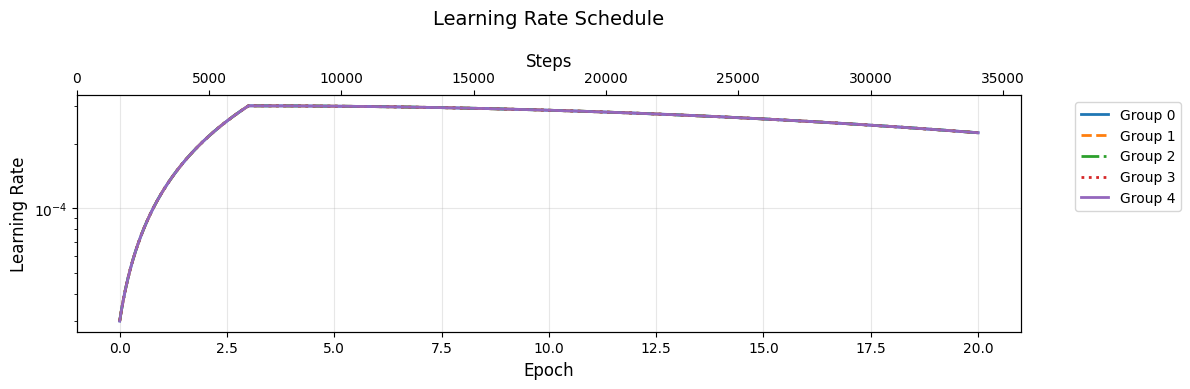

In [21]:
test_scheduler = create_scheduler(
    optimizer=trainer.optimizer,
    scheduler_config=config['scheduler'],
    train_loader=train_loader,
    gradient_accumulation_steps=config['training']['gradient_accumulation_steps']
)

plot_lr_schedule(
    scheduler=test_scheduler,
    num_epochs=20,
    train_loader=train_loader,
    gradient_accumulation_steps=config['training']['gradient_accumulation_steps']
)

#### Setting up the scheduler

In [22]:
trainer.scheduler = create_scheduler(
    optimizer=trainer.optimizer,
    scheduler_config=config['scheduler'],
    train_loader=train_loader,
    gradient_accumulation_steps=config['training']['gradient_accumulation_steps']
)


📈 Configuring Learning Rate Scheduler:
├── Type: COSINE
├── Cosine Annealing Settings:
│   ├── T_max: 50 epochs (89200 steps)
│   └── Min LR: 1e-05
├── Warmup Settings:
│   ├── Duration: 3 epochs (5352 steps)
│   ├── Start Factor: 0.1
│   └── End Factor: 1.0


#### Train
- Set your epochs and start training!
- `NOTE`: A `scheduler` gets initialized in this call based on the config.

In [ ]:
trainer.train(train_loader, val_loader, epochs=50)

#### Inference



In [ ]:
recognition_config = {
    'num_batches': None,
    'temperature': 1.0,
    'repeat_penalty': 1.0,
    'lm_weight': None,
    'lm_model': None,
    'beam_width': 6, # Beam width of 1 reverts to greedy
}

# Recognize with the shallow fusion config
config_name = "test"
print(f"Evaluating with {config_name} config")
results = trainer.recognize(test_loader, recognition_config, config_name=config_name, max_length=max_transcript_len)


# Calculate metrics on full batch
generated = [r['generated'] for r in results]
results_df = pd.DataFrame(
    {
        'id': range(len(generated)),
        'transcription': generated
    }
)

# Cleanup (Will end wandb run)
trainer.cleanup()

## Submit to Kaggle

### Authenticate Kaggle
In order to use the Kaggle’s public API, you must first authenticate using an API token. Go to the 'Account' tab of your user profile and select 'Create New Token'. This will trigger the download of kaggle.json, a file containing your API credentials.
- `TODO`: Set your kaggle username and api key here based on the API credentials listed in the kaggle.json




In [ ]:
import os
os.environ["KAGGLE_USERNAME"] = "your_kaggle_username_here"
os.environ["KAGGLE_KEY"] = "your_kaggle_api_key_here"

In [ ]:
results_df.head()

### Submit

In [ ]:
# results_df.to_csv("results.csv", index=False)
!kaggle competitions submit -c 11-785-hw-4-p-2-automatic-speech-recognition-f-25 -f results.csv -m "My Submission"

#### TODO: Generate a model_metadata.json file to save your model's data (due 48 hours after Kaggle submission deadline OR the day of slack submission)

In [ ]:
import json, os, sys, torch, datetime
################################
# TODO: Keep the model_metadata.json
# file safe for submission ater.
################################
def is_colab():
    return "google.colab" in sys.modules and "COLAB_GPU" in os.environ

def is_kaggle():
    return "KAGGLE_KERNEL_RUN_TYPE" in os.environ or "KAGGLE_URL_BASE" in os.environ

def generate_model_submission_file(model):
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M")
    json_filename = f"model_metadata_{timestamp}.json"

    # Create JSON with parameter count, model architecture, and predictions
    output_json = {
        "parameter_count": sum(p.numel() for p in model.parameters() if p.requires_grad),
        "model_architecture": str(model),
    }

    # Save metadata JSON
    with open(json_filename, "w") as f:
        json.dump(output_json, f, indent=2)

    # Download / display link depending on environment
    if is_colab():
        from google.colab import files
        print(f"OK: Saved as {json_filename}. Downloading in Colab...")
        files.download(json_filename)

    elif is_kaggle():
        from IPython.display import FileLink, display
        print("#" * 100)
        print(f"OK: Your submission file `{json_filename}` has been generated.")
        print("TODO: Click the link below.")
        print("1. The file will open in a new tab.")
        print("2. Right-click anywhere in the new tab and select 'Save As...'")
        print("3. Save the file to your computer with the `.json` extension.")
        print("You MUST submit this file to Autolab if this is your best submission.")
        print("#" * 100 + "\n")
        display(FileLink(json_filename))

    else:
        print(f"OK: saved model data saved to: '{json_filename}'")
        print("REQUIRED to submit to Autolab if these are the best model weights.")

generate_model_submission_file(model)
#### IMPORTANT: Do NOT change the name of the model_metadata_....json file!!

OK: saved model data saved to: 'model_metadata_2025-11-22_21-38.json'
REQUIRED to submit to Autolab if these are the best model weights.


## TODO: fill in your submission requirements

### Notes:

- You will need to set the root path to your submission files (eg. MODEL_METADATA_JSON, NOTEBOOK_PATH, HW4LIB_PATH). This will depend on your setup. For eg. if you are following our setup instruction:
  - `Colab:`: `"/content/..."`In the left file pane, right-click the desired file or folder and select “Copy path”.
  - `PSC`: `"/jet/home/<your_username>/..."` You can check the files in this path by running: ```!ls /jet/home/<your_username>/```

Kindly modify your configurations to suit your ablations and be keen to include your name.

In [39]:
####################################
#             README
####################################

# TODO: Please complete all components of this README
README = """
- **Model**: Encoder-Decoder Transformer architecture for ASR with Pre-LN (Layer Normalization) design. The model consists of:
  - Speech embedding layer with convolutional time reduction (factor 2) to downsample input features from 80-dim log mel filterbank features
  - Encoder stack: 4 layers with 8 attention heads each, d_model=256, d_ff=1024
  - Decoder stack: 4 layers with 8 attention heads each, d_model=256, d_ff=1024
  - Cross-attention mechanism in decoder layers to attend to encoder outputs
  - CTC auxiliary head for joint training with attention-based decoder
  - Positional encoding applied to both encoder and decoder
  - Dropout rate: 0.05, no layer dropout or weight tying

- **Training Strategy**: 
  - Optimizer: AdamW with learning rate 0.0003, weight decay 0.0001, betas [0.9, 0.999]
  - Scheduler: Cosine annealing with linear warmup (3 epochs, start_factor 0.1, T_max=50, eta_min=0.00001)
  - Loss function: Cross-entropy loss with label smoothing (0.05) + CTC auxiliary loss (weight 0.2) for joint training
  - Mixed precision training enabled for faster training
  - Gradient accumulation: 1 step
  - Batch size: 16
  - Tokenization: 5k subword BPE tokenizer

- **Augmentations**: SpecAugment data augmentation applied during training:
  - Frequency masking: 2 masks per sample with width range of 5 frequency bands
  - Time masking: 2 masks per sample with width range of 30 time steps
  - Applied only during training, not during validation/testing
  https://wandb.ai/agcheria-carnegie-mellon-university/HW4P2/runs/4r4hchz6
"""

####################################
#       Credentials (Optional)
####################################

# These are not required **IF** you have run the cells to declare these variables above.
# If you would like to paste your credentials here again, feel free to:
# OPTIONAL: Fill these out if you do not want to re-run previous cells to re-initialize these credential variables

KAGGLE_USERNAME = "abiencherian" #TODO
KAGGLE_API_KEY = "c83ee58afe9674c27cb058a57ac06e84" #TODO
WANDB_API_KEY = "eabb582e1efc2a835b3249aeff11d88def7f0794" #TODO


####################################
#             Wandb Logs
####################################

# TODO: Your wandb project url should look like https://wandb.ai/username-or-team-name/project-name
#(Take these parameters and put them in the variables below)

WANDB_USERNAME_OR_TEAMNAME = "agcheria-carnegie-mellon-university" # TODO: Put your username-or-team-name here
WANDB_PROJECT = "HW4P2" # TODO: Put your project-name

####################################
#         Notebook & Files
####################################

# TODO: Download HW4P2 Notebook (if on colab or kaggle) and upload both your HW4P2 notebook + model_metadata_*.json to your file system.
# TODO: For each file, obtain the file paths and put them below.

# TODO: COLAB INSTRUCTIONS:
# * With Colab, upload your desired file (notebook or model_metadata.json) to "Files"
# * Right-click the file, click "Copy Path,"
# * Paste the path below.

# TODO: KAGGLE INSTRUCTIONS:
# * First download a copy of your notebook with "File > Download Notebook"
# Then...
# * Click "File" in the top left of the screen
# * Go to "Upload Input > Upload Model"
# * Upload your notebook file.
# * For "Model Name" put HW4P2_Final_Submission
# * For "Framework" put "Other"
# * For "License" put "Other"
# * Click "Upload another file" and upload your model_metadata####.json file as well.
# * Now, on your right in your "Models" section, you should see a new folder with your submission files.
# * Click on the "Copy File Path" buttons for the notebook and json file and paste them below.

# TODO: Linux system:
# * Simply upload or find the path of your notebook file and model_metadata###.json file, and paste them here.

NOTEBOOK_PATH = "/home/agcheria/idl_assignment_Fall_2025/HW4/HW4P2/HW4P2_Student_Starter_Notebook.ipynb" # TODO: Put your HW4P2 notebook path here
MODEL_METADATA_JSON = "/home/agcheria/idl_assignment_Fall_2025/HW4/HW4P2/model_metadata_2025-11-22_21-26.json" # TODO: Put your Model Metadata path json file here (see end of HW4P2 Code Notebook to get this file)
HW4LIB_PATH = "/home/agcheria/idl_assignment_Fall_2025/HW4/HW4P2/hw4lib" # TODO: Put your hw4lib path here

####################################
#         Additional Files
####################################

ADDITIONAL_FILES = ["/home/agcheria/idl_assignment_Fall_2025/HW4/HW4P2/mytorch" # TODO: Upload any files and add any paths to any additional files you would like to include in your submission, otherwise, leave this empty
]
import sys
sys.path.insert(0, "/home/agcheria/idl_assignment_Fall_2025/HW4/HW4P2")
####################################
#         SLACK SUBMISSION
####################################

ENABLE_SLACK_SUBMISSION = False # TODO: Set this to true if you are submitting to the Slack competition

####################################
#     Creating the Submission
####################################

# TODO: Once the README, wandb information, and file paths are filled in, run this cell,
# run the "Assignment Backend Functions" in the next cells, and generate the final zip file at the end.

SAFE_SUBMISSION = True # TODO: Set this to False if you want to generate a submission.zip even if you are missing files, otherwise it's recommended to keep this as True


# Assignment Backend Submission Functions (DO NOT MODIFY, just run these cells)

In [40]:
from datetime import datetime

######################################
#       Assignment Configs
######################################

WANDB_METRIC = "CER"
WANDB_DIRECTION = "descending"
WANDB_TOP_N = 10
WANDB_OUTPUT_PKL = "wandb_top_runs.pkl"

# Kaggle configuration
COMPETITION_NAME = "11-785-hw-4-p-2-automatic-speech-recognition-f-25"
SLACK_COMPETITION_NAME = "slack-hw-4-p-2-f-25"
FINAL_SUBMISSION_DATETIME = datetime.strptime("2025-12-06 00:00:00", "%Y-%m-%d %H:%M:%S")
SLACK_SUBMISSION_DATETIME = datetime.strptime("2025-12-11 00:00:00", "%Y-%m-%d %H:%M:%S")
GRADING_DIRECTION = "descending"
KAGGLE_OUTPUT_JSON = "kaggle_data.json"

SUBMISSION_OUTPUT = "HW4P2_final_submission.zip"

In [41]:
from datetime import datetime, timezone
import zoneinfo

eastern = zoneinfo.ZoneInfo("America/New_York")
FINAL_DEADLINE_UTC = (
    FINAL_SUBMISSION_DATETIME
    .replace(tzinfo=eastern)
    .astimezone(timezone.utc)
)

SLACK_DEADLINE_UTC = (
    SLACK_SUBMISSION_DATETIME
    .replace(tzinfo=eastern)
    .astimezone(timezone.utc)
)

ACKNOWLEDGEMENT_MESSAGE = """
Submission of this file and assignment indicate the student's agreement to the following Aknowledgement requirements:
Setting the ACNKOWLEDGED flag to True indicates full understanding and acceptance of the following:
1. Slack days may ONLY be used on P2 FINAL (not checkpoint) submission. I.e. you may use slack days to submit final P2 kaggle scores (such as this one) later on the **SLACK KAGGLE COMPETITION** at the expense of your Slack days.
2. The final autolab **code submission is due 48 hours after** the conclusion of the Kaggle Deadline (or, the same day as your final kaggle submission).
3. Course staff will require your kaggle username here, and then will pull your official PRIVATE kaggle leaderboard score. This submission may result in slight variance in scores/code, but we will check for acceptable discrepancies. Any discrepancies related to modifying the submission code (at the bottom of the notebook) will result in an AIV.
4. You are NOT allowed to use any code that will pre-load models (such as those from Hugging Face, etc.).
   You MAY use models described by papers or articles, but you MUST implement them yourself through fundamental PyTorch operations (i.e. Linear, Conv2d, etc.).
5. You are NOT allowed to use any external data/datasets at ANY point of this assignment.
6. You may work with teammates to run ablations/experiments, BUT you must submit your OWN code and your OWN results.
7. Failure to comply with the prior rules will be considered an Academic Integrity Violation (AIV).
8. Late submissions MUST be submitted through the Slack Kaggle (see writeup for details). Any submissions made to the regular Kaggle after the original deadline will NOT be considered, no matter how many slack days remain for the student.
"""
def save_acknowledgment_file():
    if ACKNOWLEDGED:
        with open("acknowledgement.txt", "w") as f:
            f.write(ACKNOWLEDGEMENT_MESSAGE.strip())
        print("Saved acknowledgement.txt")
        return True
    else:
        print("ERROR: Must set ACKNOWLEDGED = True.")
        return False
# Saves README
def save_readme(readme):
    try:
        with open("README.txt", "w") as f:
            f.write(readme.strip())

        print("Saved README.txt")
    except Exception as e:
        print(f"ERROR: Error occured while saving README.txt: {e}")
        return False

    return True

# Saves wandb logs
import wandb, json, pickle

def save_top_wandb_runs():
    wandb.login(key=WANDB_API_KEY)
    if not ACKNOWLEDGED:
        print("ERROR: Must set ACKNOWLEDGED = True.")
        return False

    api = wandb.Api()
    runs = api.runs(
        f"{WANDB_USERNAME_OR_TEAMNAME}/{WANDB_PROJECT}",
        order=f"{'-' if WANDB_DIRECTION == 'descending' else ''}summary_metrics.{WANDB_METRIC}"
    )
    selected_runs = runs[:min(WANDB_TOP_N, len(runs))]

    if not selected_runs:
        print(f"ERROR: No runs found for {WANDB_USERNAME_OR_TEAMNAME}/{WANDB_PROJECT}. Please check that your wandb credentials (Wandb Username/Team Name, API Key, and Project Name) are correct.")
        return False

    all_data = []
    for run in selected_runs:
        run_data = {
            "id": run.id,
            "name": run.name,
            "tags": run.tags,
            "state": run.state,
            "created_at": str(run.created_at),
            "config": run.config,
            "summary": dict(run.summary),
        }
        try:
            run_data["history"] = run.history(samples=1000)
        except Exception as e:
            run_data["history"] = f"Failed to fetch history: {str(e)}"
        all_data.append(run_data)
    with open(WANDB_OUTPUT_PKL, "wb") as f:
        pickle.dump(all_data, f)

    print(f"OK: Exported {len(all_data)} WandB runs to {WANDB_OUTPUT_PKL}")

    return True
# Saves kaggle information

# Install dependencies silently (only if running on Colab)
import sys

from datetime import datetime
import os, json, requests
def kaggle_login(username, key):
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
    with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
        json.dump({"username": username, "key": key}, f)
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)


def get_active_submission_config():
    if ENABLE_SLACK_SUBMISSION:
        return SLACK_COMPETITION_NAME, SLACK_DEADLINE_UTC
    return COMPETITION_NAME, FINAL_DEADLINE_UTC

def kaggle_user_exists(usernagbme):
    try:
        return requests.get(f"https://www.kaggle.com/{KAGGLE_USERNAME}").status_code == 200
    except Exception as e:
        print(f"ERROR: Error occured while checking Kaggle user: {e}")
        return False

DEFAULT_SCORE=0
if GRADING_DIRECTION == "ascending":
    DEFAULT_SCORE=0
else:
    DEFAULT_SCORE=1.0

def get_best_kaggle_score(subs):
    def extract_score(s): return float(s.private_score or s.public_score or DEFAULT_SCORE)
    if not subs:
        return None, None
    best = max(subs, key=lambda s: extract_score(s) if GRADING_DIRECTION == "ascending" else -extract_score(s))

    score_type = "private" if best.private_score not in [None, ""] else "public"
    return extract_score(best), score_type

def save_kaggle_json(kaggle_username, kaggle_key):

    kaggle_login(kaggle_username, kaggle_key)

    from kaggle.api.kaggle_api_extended import KaggleApi

    if not ACKNOWLEDGED:
        print("ERROR: Must set ACKNOWLEDGED = True.")
        return False

    if not kaggle_user_exists(KAGGLE_USERNAME):
        print(f"ERROR: User '{KAGGLE_USERNAME}' not found.")
        return False

    comp_name, deadline = get_active_submission_config()

    api = KaggleApi()
    api.authenticate()

    # Get competition submissions
    submissions = [s for s in api.competition_submissions(comp_name) if getattr(s, "_submitted_by", None) == KAGGLE_USERNAME]
    if not submissions:
        print(f"ERROR: No valid submissions found for user [{KAGGLE_USERNAME}] for this competition [{comp_name}]. Slack flag set to [{ENABLE_SLACK_SUBMISSION}]")
        print("Please double check your Kaggle username and ensure you've submitted at least once.")
        return False

    score, score_type = get_best_kaggle_score(submissions)
    result = {
        "kaggle_username": KAGGLE_USERNAME,
        "acknowledgement": ACKNOWLEDGED,
        "submitted_slack": ENABLE_SLACK_SUBMISSION,
        "competition_name": comp_name,
        "deadline": deadline.strftime("%Y-%m-%d %H:%M:%S"),
        "raw_score": score * 100.0,
        "score_type": score_type,
    }

    print(f"OK: Projected score (excluding bonuses) saved as {KAGGLE_OUTPUT_JSON}")
    if score:
        print(f"Best score {score}.")
        with open(KAGGLE_OUTPUT_JSON, "w") as f:
            json.dump(result, f, indent=2)
        return True
    return False

import os
import sys
import zipfile


def create_submission_zip(additional_files, safe_flag):
    if not "ACKNOWLEDGED" in globals() or not ACKNOWLEDGED:
        print("ERROR: Make sure to RUN the Acknowledgement cell (at the top of the notebook). Also, must set ACKNOWLEDGED = True.")
        return

    if (not save_acknowledgment_file()):
        print("ERROR: Make sure to RUN the Acknowledgement cell (at the top of the notebook). Also, must set ACKNOWLEDGED = True.")
        return


    if not "ENABLE_SLACK_SUBMISSION" in globals() or ENABLE_SLACK_SUBMISSION is None:
        print("ERROR: \"ENABLE_SLACK_SUBMISSION\" variable is not defined. \nTODO: Make sure to RUN the cell (A few cells up at the beginning of the submission section). \nMake sure to set the ENABLE_SLACK_SUBMISSION checkbox if you're on colab, or set the parameter correctly set on other platforms \n(if you are submitting through the SLACK submission).")
        return

    if not "README" in globals() or not README:
        print("ERROR: Make sure to RUN the README cell(above your credentials cell).")
        return

    if (not save_readme(README)):
        print("ERROR: Error while saving the README file. Make sure to complete and RUN the README cell(above your credentials cell).")
        return

    if (not save_top_wandb_runs()):
        return

    if not "KAGGLE_USERNAME" in globals() or not "KAGGLE_API_KEY" in globals() or not KAGGLE_USERNAME or not KAGGLE_API_KEY:
        print("ERROR: Make sure to set KAGGLE_USERNAME and KAGGLE_API_KEY for this code submission.")
        return

    if (not save_kaggle_json(KAGGLE_USERNAME, KAGGLE_API_KEY)):
        print(f"ERROR: An error occured while retrieve kaggle information from username [{KAGGLE_USERNAME}] from competition [{get_active_submission_config()[0]}] with slack flag set to [{ENABLE_SLACK_SUBMISSION}]. Please check your kaggle username, key, and submission.")
        return

    files_to_zip = [
        "acknowledgement.txt",
        "README.txt",
        KAGGLE_OUTPUT_JSON,
        WANDB_OUTPUT_PKL,
        MODEL_METADATA_JSON,
        NOTEBOOK_PATH,
        HW4LIB_PATH,
    ] + additional_files

    missing_files = False

    with zipfile.ZipFile(SUBMISSION_OUTPUT, "w") as zipf:
        for file_path in files_to_zip:
            if os.path.exists(file_path):
                if os.path.isfile(file_path):
                    # It's a file, add it directly
                    arcname = os.path.basename(file_path)  # flatten path
                    zipf.write(file_path, arcname=arcname)
                    print(f"OK: Added {arcname}")
                elif os.path.isdir(file_path):
                    # It's a directory, recursively add all files
                    dir_name = os.path.basename(file_path)
                    for root, dirs, files in os.walk(file_path):
                        for file in files:
                            file_full_path = os.path.join(root, file)
                            # Create relative path from the directory being zipped
                            arcname = os.path.join(dir_name, os.path.relpath(file_full_path, file_path))
                            zipf.write(file_full_path, arcname=arcname)
                    print(f"OK: Added directory {dir_name} (with all subfolders)")
            else:
                missing_files = True
                print(f"ERROR: Missing file: {file_path}")

    if missing_files:
        if safe_flag:
            raise "ERROR: Missing files with safety flag set to True. Please upload any necessary files, ensure you have the correct paths and rerun all cells."
        else:
            print("WARNING: Missing files with safety flag set to False. Submission may be incomplete.")

    if "google.colab" in sys.modules:
        from google.colab import files
        files.download(SUBMISSION_OUTPUT)

    print("Final submission saved as:", SUBMISSION_OUTPUT)

# File Generation (TODO: Check file generation outputs for any errors)

### For Colab and PSC users:

In [42]:
create_submission_zip(ADDITIONAL_FILES, SAFE_SUBMISSION)

#TODO: If the HW4P2_final_submission.zip file does not
# automatically bring up a donwload pop-up
# Then make sure to entire the files and
#manually download the checkpoint_submission.json file.

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Saved acknowledgement.txt
Saved README.txt
OK: Exported 2 WandB runs to wandb_top_runs.pkl
OK: Projected score (excluding bonuses) saved as kaggle_data.json
Best score 11.30806.
OK: Added acknowledgement.txt
OK: Added README.txt
OK: Added kaggle_data.json
OK: Added wandb_top_runs.pkl
OK: Added model_metadata_2025-11-22_21-26.json
OK: Added HW4P2_Student_Starter_Notebook.ipynb
OK: Added directory hw4lib (with all subfolders)
OK: Added directory mytorch (with all subfolders)
Final submission saved as: HW4P2_final_submission.zip
